In [101]:
import numpy as np
import pandas as pd
import math
import networkx as nx
import matplotlib.pyplot as plt
from networkx.generators.degree_seq import expected_degree_graph
from networkx.generators.degree_seq import configuration_model
import random
from scipy.stats import poisson
from scipy.special import factorial

# Binary Search for Q3d

In [5]:
l=100000
r=1000000
p=10**(-4)
print("The probability is {}".format(p))
count=0
while(l<r):
    count+=1
    mid = (l+r)//2
    lhs = mid*p
    rhs = math.log(mid)
    print("{},{},{}".format(mid,lhs,rhs))
    if(lhs<rhs):
        l = mid+1
    elif(rhs<lhs):
        r = mid-1
    elif(np.isclose(lhs,rhs)):
        print("Found value at: {}".format(mid))
    if(count>1000000):
        print("Not found")
        break


The probability is 0.0001
550000,55.0,13.217673557208654
324999,32.499900000000004,12.691577384384065
212499,21.2499,12.266692561453183
156249,15.6249,11.959206167578168
128124,12.8124,11.760753823966303
114061,11.4061,11.644488671987546
121092,12.109200000000001,11.704305866252529
117576,11.7576,11.67484021198652
115818,11.581800000000001,11.65977527245593
116697,11.6697,11.667336111003344
116257,11.6257,11.663558536690513
116477,11.6477,11.66544910760433
116587,11.658700000000001,11.6663930544015
116642,11.664200000000001,11.666864693871887
116669,11.6669,11.667096144597489
116683,11.6683,11.667216134998402
116676,11.6676,11.667156141597657
116672,11.667200000000001,11.667121858038335
116670,11.667,11.667104715817903


# Q4

In [7]:
digraph = nx.read_gml('airport-network.gml')

In [8]:
print("Number of nodes: %d" % digraph.number_of_nodes())
print("Number of edges: %d" % digraph.number_of_edges())
print("Graph density:\t %1.7f" % nx.density(digraph))

Number of nodes: 1574
Number of edges: 17215
Graph density:	 0.0139060


In [12]:
def plot_degree(degree, number_of_bins=50, log_binning=True, base=2):
    """
    Given a degree sequence, return the y values (probability) and the
    x values (support) of a degree distribution that you're going to plot.
    
    Parameters
    ----------
    degree (np.ndarray or list):
        a vector of length N that corresponds to the degree, k_i, of every
        node, v_i, in the network

    number_of_bins (int):
        length of output vectors
    
    log_binning (bool)
        if you are plotting on a log-log axis, then this is useful
    
    base (int):
        log base, defaults to 2
        
    Returns
    -------
    x, y (np.ndarray):
        the support and probability values of the degree distribution
    
    """
    
    # We need to define the support of our distribution
    lower_bound = min(degree)
    upper_bound = max(degree)
    
    # And the bins
    if log_binning:
        log = np.log2 if base == 2 else np.log10
        lower_bound = log(lower_bound) if lower_bound >= 1 else 0.0
        upper_bound = log(upper_bound)
        bins = np.logspace(lower_bound,upper_bound,number_of_bins, base = base)
    else:
        bins = np.linspace(lower_bound,upper_bound,number_of_bins)
    
    # Then we can compute the histogram using numpy
    y, __ = np.histogram(degree, 
                         bins=bins,
                         density=True)
    # Now, we need to compute for each y the value of x
    x = bins[1:] - np.diff(bins)/2.0
        
    return x, y

## part a

In [11]:
nx.transitivity(digraph)

0.38414344664491556

In [17]:
degree = dict(digraph.degree())
degree = list(degree.values())

In [19]:
x1, y1 = plot_degree(degree, number_of_bins=80, log_binning=True, base=2)

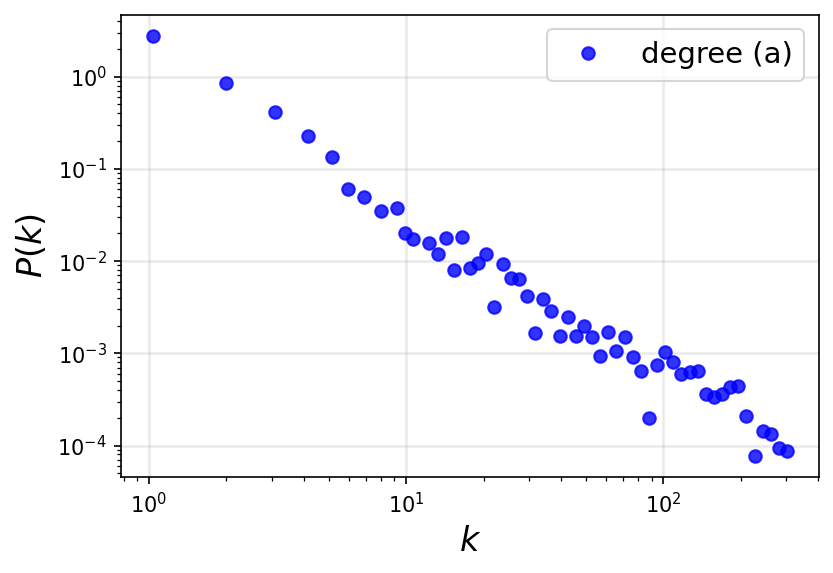

In [22]:
fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)

ax.loglog(x1, y1,'o', color='blue', label='degree (a)', alpha=0.8)


ax.set_xlabel(r"$k$", fontsize=16)
ax.set_ylabel(r"$P(k)$", fontsize=16)

ax.legend(fontsize=14)

ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

#plt.savefig('../figs/pngs/PolBlogs_inout_degreedist.png', dpi=425, bbox_inches='tight')
#plt.savefig('../figs/pdfs/PolBlogs_inout_degreedist.pdf', bbox_inches='tight')
plt.show()

## part c

In [34]:
def plot_fn(x_series, y_serries, msg=None):
    fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)

    ax.loglog(x_series, y_serries,'o', color='blue', label=msg, alpha=0.8)


    ax.set_xlabel(r"$k$", fontsize=16)
    ax.set_ylabel(r"$P(k)$", fontsize=16)

    ax.legend(fontsize=14)

    ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

    #plt.savefig('../figs/pngs/PolBlogs_inout_degreedist.png', dpi=425, bbox_inches='tight')
    #plt.savefig('../figs/pdfs/PolBlogs_inout_degreedist.pdf', bbox_inches='tight')
    plt.show()

In [41]:
expected_random_digraph = expected_degree_graph(degree)
config_random_graph = configuration_model(degree)

In [42]:
print(nx.transitivity(expected_random_digraph))
print(nx.transitivity(config_random_graph))

0.2863019621641398


NetworkXNotImplemented: not implemented for multigraph type

In [43]:
er_degree = list(dict(expected_random_digraph.degree()).values())
config_degree = list(dict(config_random_graph.degree()).values())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


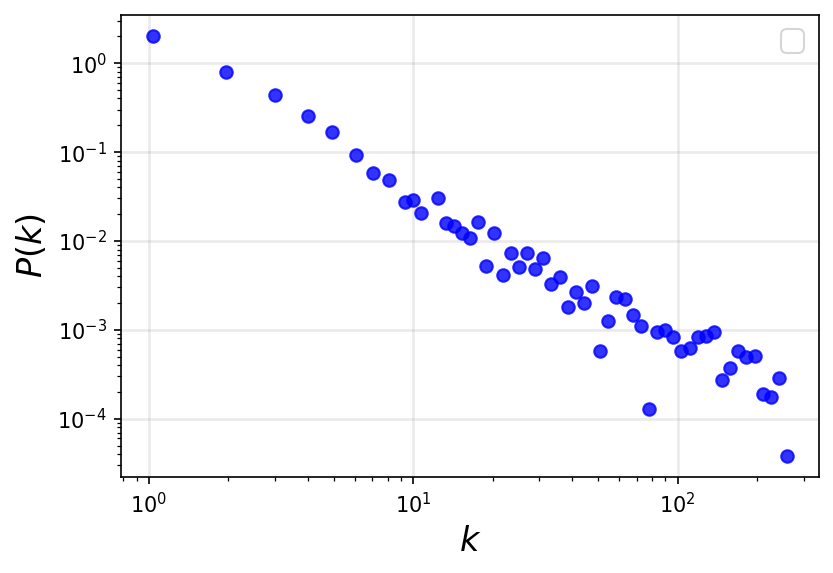

In [44]:
x, y = plot_degree(er_degree, number_of_bins=80, log_binning=True, base=2)
plot_fn(x,y)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


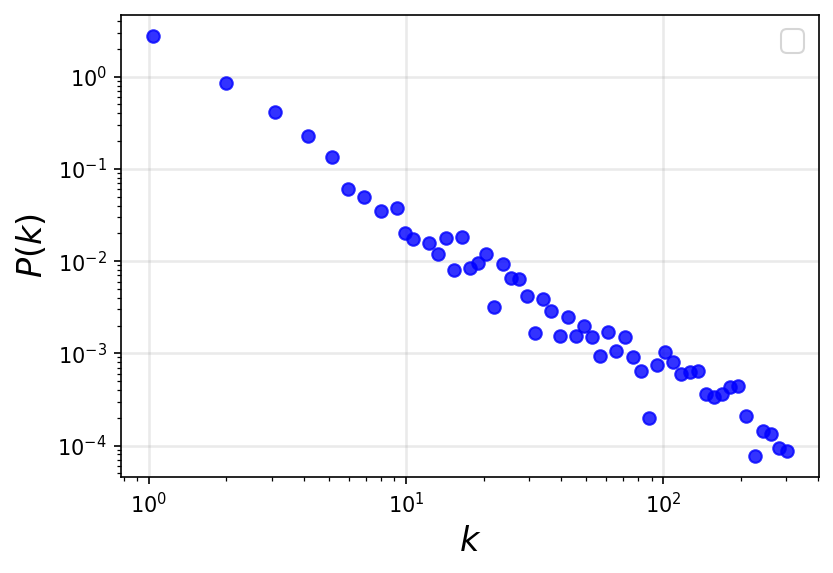

In [36]:
x, y = plot_degree(config_degree, number_of_bins=80, log_binning=True, base=2)
plot_fn(x,y)

## part b

In [60]:
er_random_graph = nx.binomial_graph(digraph.number_of_nodes(), nx.density(digraph))

In [61]:
er_random_graph.number_of_edges()

17256

In [72]:
nx.transitivity(er_random_graph)

0.013366686145978492

In [51]:
digraph.number_of_edges()

17215

In [69]:
edges = list(digraph.edges())

# Shuffle the edges randomly
random.shuffle(edges)

# Create a new graph with the same nodes and the shuffled edges
randomized_graph = nx.Graph()
randomized_graph.add_edges_from(edges)

In [70]:
print(randomized_graph.number_of_nodes())
print(randomized_graph.number_of_edges())

1574
17215


In [71]:
nx.transitivity(randomized_graph)

0.38414344664491556

In [73]:
random_edges_count = nx.gnm_random_graph(digraph.number_of_nodes(),digraph.number_of_edges())

In [74]:
print(random_edges_count.number_of_edges())
print(random_edges_count.number_of_nodes())
print(nx.transitivity(random_edges_count))

17215
1574
0.013761504442408064


In [75]:
random_degree = list(dict(random_edges_count.degree()).values())

In [76]:
x1, y1 = plot_degree(degree, number_of_bins=80, log_binning=True, base=2)
x2, y2 = plot_degree(er_degree, number_of_bins=80, log_binning=True, base=2)
x3, y3 = plot_degree(random_degree, number_of_bins=80, log_binning=True, base=2)

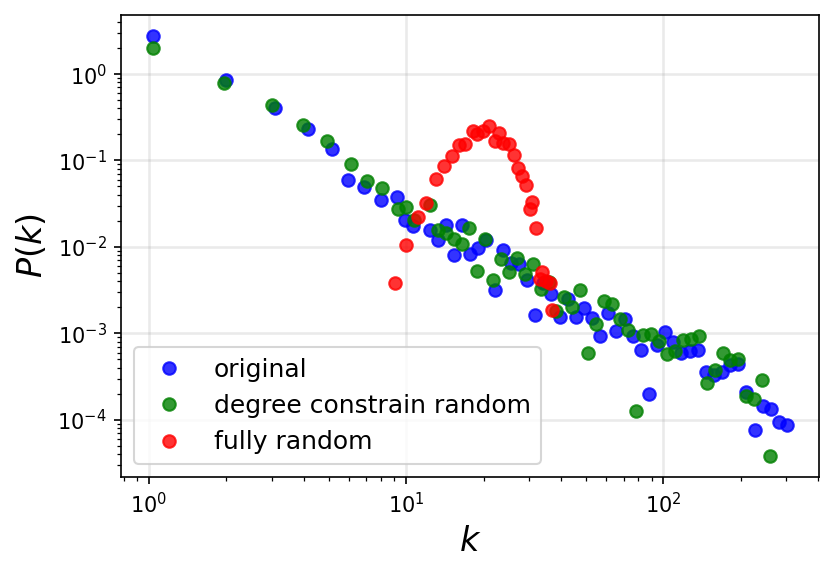

In [80]:
fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)

ax.loglog(x1, y1,'o', color='blue', label='original', alpha=0.8)
ax.loglog(x2, y2,'o', color='green', label='degree constrain random', alpha=0.8)
ax.loglog(x3, y3,'o', color='red', label='fully random', alpha=0.8)

ax.set_xlabel(r"$k$", fontsize=16)
ax.set_ylabel(r"$P(k)$", fontsize=16)

ax.legend(fontsize=12)

ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

#plt.savefig('../figs/pngs/PolBlogs_inout_degreedist.png', dpi=425, bbox_inches='tight')
#plt.savefig('../figs/pdfs/PolBlogs_inout_degreedist.pdf', bbox_inches='tight')
plt.show()

## part e

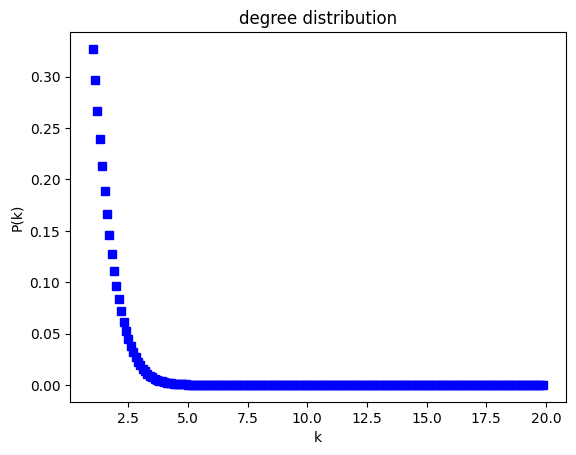

In [105]:
t = np.arange(1, 20, 0.1)
d = np.exp(-0.59)*np.power(0.59, t)/factorial(t)

plt.plot(t, d, 'bs')
plt.title('degree distribution')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.show()

# Q5

Graph is connected: True


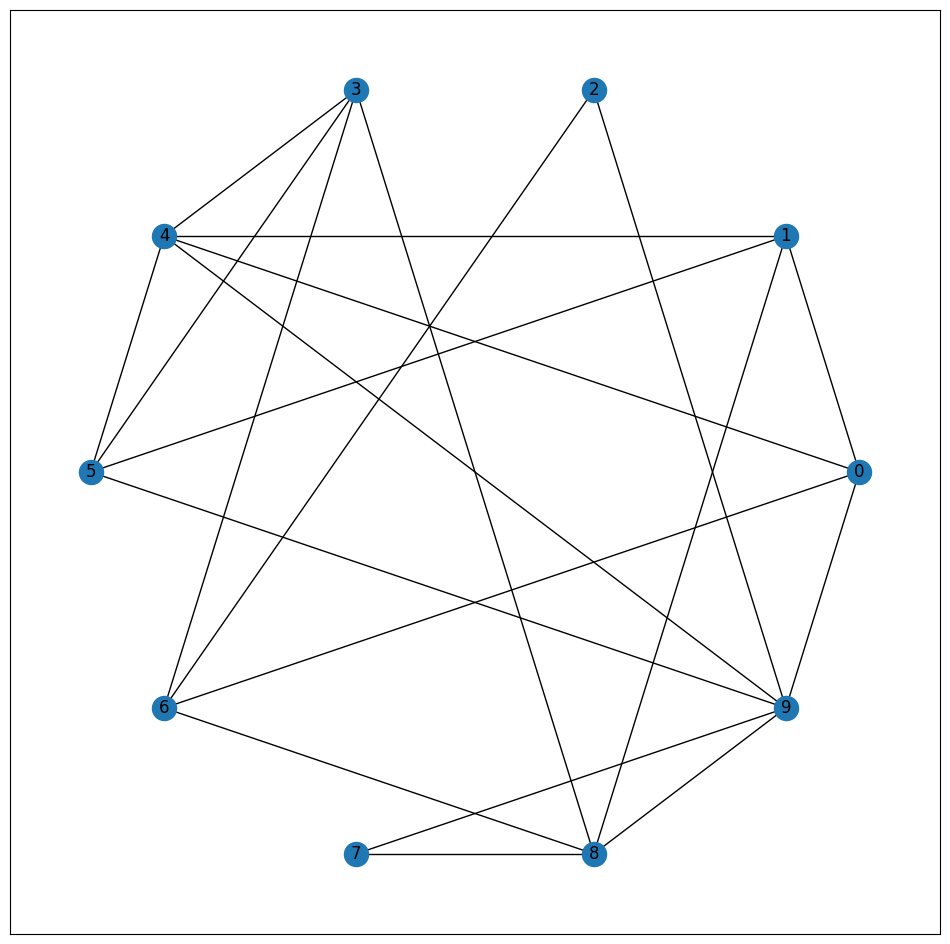

In [86]:
G = nx.connected_watts_strogatz_graph(n=10,k=4,p=0.5)
pos = nx.circular_layout(G)
print("Graph is connected: {}".format(nx.is_connected(G)))
plt.figure(figsize = (12, 12))
nx.draw_networkx(G, pos)

In [87]:
nx.average_shortest_path_length(G)

1.5777777777777777

In [88]:
nx.average_clustering(G)

0.3566666666666667

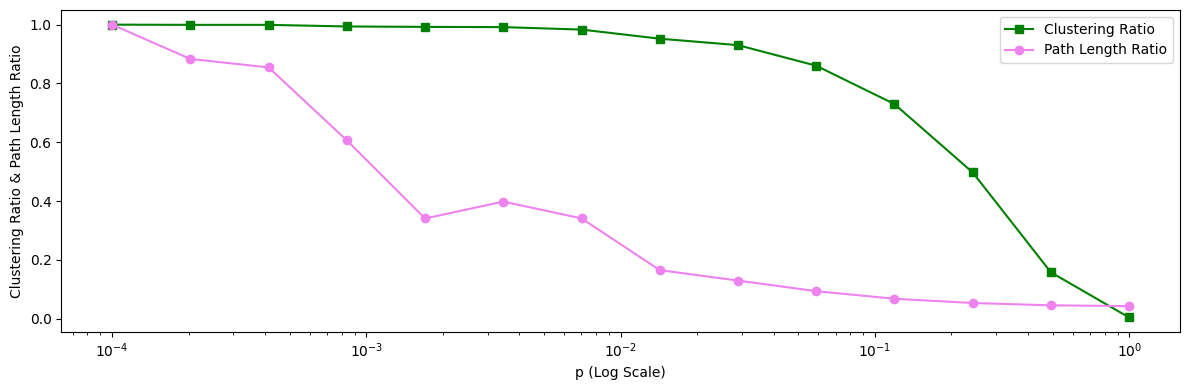

In [98]:
# Set the number of nodes (N) and the number of edges (K) for the initial lattice
N = 1000
K = 4

# Create the initial regular lattice (ring graph)
G = nx.connected_watts_strogatz_graph(n=N, k=K, p=0)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 1, figsize=(12, 4))

# Define a range of 'p' values to vary (logarithmic scale)
p_values = np.logspace(-4, 0, 14)

# Store results
ratios_clustering = []
ratios_path_length = []

# Calculate the average clustering coefficient and average shortest path length for the original lattice
original_clustering = nx.average_clustering(G)
original_path_length = nx.average_shortest_path_length(G)

for p in p_values:
    # Generate a connected Watts-Strogatz graph with varying 'p'
    rewired_G = nx.connected_watts_strogatz_graph(N, K, p)

    # Calculate average clustering coefficient and average shortest path length for the rewired graph
    avg_clustering = nx.average_clustering(rewired_G)
    avg_shortest_path = nx.average_shortest_path_length(rewired_G)

    # Calculate ratios
    ratio_clustering = avg_clustering / original_clustering
    ratio_path_length = avg_shortest_path / original_path_length

    # Store ratios
    ratios_clustering.append(ratio_clustering)
    ratios_path_length.append(ratio_path_length)

# Plot the ratios
axes.semilogx(p_values, ratios_clustering, marker='s', label='Clustering Ratio', color = 'green')
axes.semilogx(p_values, ratios_path_length, marker='o', label='Path Length Ratio', color = 'violet')

# Set axis labels and titles
axes.set_xlabel('p (Log Scale)')
axes.set_ylabel('Clustering Ratio & Path Length Ratio')
#axes.set_xlabel('p (Log Scale)')
#axes.set_ylabel('Path Length Ratio')

# Add legends
axes.legend()
#axes[1].legend()

# Show the plot
plt.tight_layout()
plt.show()


digraph = nx.DiGraph()
with open('../data/polblogs_nodes_class.tsv','r') as fp:
    for line in fp:
        node_id, node_label, node_political = line.strip().split('\t')
        political_orientation = 'liberal' if node_political == '0' else 'conservative'
        digraph.add_node(node_id, website=node_label, political_orientation=political_orientation)